### aim: use monitorRobot breakdown csvs to tell us some stuff about carbon flux spinup

run `mm` and then `robot` to refresh breakdowns

### date: 

In [87]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [88]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [89]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [90]:
mod = {
    
    'TOM12_TJ_GPA2' : {
        'desc': 'era2 | co2 DYN | clim DYN | 1749 rest.',
        'color' : 'k',
        'linestyle': ':'},
    'TOM12_TJ_GPA1' : {
        'desc': 'era2 | co2 DYN | clim DYN | 1947 rest.',
        'color' : 'darkgray',
        'linestyle': ':'},    
    'TOM12_TJ_GPB0' : {
        'desc': 'ncep | co2 STAT | clim DYN | 1947 rest.',
        'color' : 'indigo',
        'linestyle': ':'},  
    'TOM12_TJ_GPB1' : {
        'desc': 'era2 | co2 STAT | clim DYN | 1749 rest.',
        'color' : 'mediumorchid',
        'linestyle': ':'},  
    'TOM12_TJ_GNB0' : {
        'desc': 'ncep | co2 STAT | clim DYN | 1947 rest.',
        'color' : 'pink',
        'linestyle': ':'},
    
    'TOM12_TJ_GEA0' : {
        'desc': 'era2 | co2 DYN | clim DYN | s-u GPA2',
        'color' : 'r',
        'linestyle': '-'},  
    'TOM12_TJ_GEB0' : {
        'desc': 'era2 | co2 STAT | clim BIAS | s-u GPB1',
        'color' : 'y',
        'linestyle': '-'},  
    'TOM12_TJ_GEC0' : {
        'desc': 'era2 | co2 DYN | clim BIAS | s-u GPA2',
        'color' : 'b',
        'linestyle': '-'},  
    'TOM12_TJ_GED0' : {
        'desc': 'era2 | co2 STAT | clim DYN | s-u GPB1',
        'color' : 'g',
        'linestyle': '-'},  
    
    'TOM12_DW_GA01' : {
        'desc': 'GCB 2022 (ncep) | co2 DYN | clim DYN ',
        'color' : 'r',
        'linestyle': ':'},  
    'TOM12_DW_GB01' : {
        'desc': 'GCB 2022 (ncep) | co2 STAT | clim BIAS ',
        'color' : 'y',
        'linestyle': ':'},  
    'TOM12_DW_GC01' : {
        'desc': 'GCB 2022 (ncep) | co2 DYN | clim BIAS',
        'color' : 'b',
        'linestyle': ':'},  
    'TOM12_DW_GD01' : {
        'desc': 'GCB 2022 (ncep) | co2 STAT | clim DYN',
        'color' : 'g',
        'linestyle': ':'},  
    'TOM12_DW_WE43' : {
        'desc': 'era | co2 DYN | clim DYN',
        'color' : 'darkcyan',
        'linestyle': '--'}, 
    'TOM12_TJ_1ASA' : {
        'desc': 'ukesm | co2 DYN | clim DYN',
        'color' : 'hotpink',
        'linestyle': '--'}, 
}

mod['TOM12_DW_GD01']

models = ['TOM12_TJ_GPA2','TOM12_TJ_GPA1','TOM12_TJ_GPB0','TOM12_TJ_GPB1',\
         'TOM12_TJ_GNB0',
         'TOM12_TJ_GEA0','TOM12_TJ_GEB0','TOM12_TJ_GEC0','TOM12_TJ_GED0',
         'TOM12_DW_GA01','TOM12_DW_GB01','TOM12_DW_GC01','TOM12_DW_GD01',
          'TOM12_DW_WE43','TOM12_TJ_1ASA'
         ]

## available models

In [91]:
# models = ['TOM12_TJ_GPA2','TOM12_TJ_GPA1','TOM12_TJ_GPB0','TOM12_TJ_GPB1',\
#          'TOM12_TJ_GNB0',
#          'TOM12_TJ_GEA0','TOM12_TJ_GEB0','TOM12_TJ_GEC0','TOM12_TJ_GED0',
#          'TOM12_DW_GA01','TOM12_DW_GB01','TOM12_DW_GC01','TOM12_DW_GD01',
#          ]

for i in range(0,len(models)):
    print(models[i])
    print(mod[models[i]])

TOM12_TJ_GPA2
{'desc': 'era2 | co2 DYN | clim DYN | 1749 rest.', 'color': 'k', 'linestyle': ':'}
TOM12_TJ_GPA1
{'desc': 'era2 | co2 DYN | clim DYN | 1947 rest.', 'color': 'darkgray', 'linestyle': ':'}
TOM12_TJ_GPB0
{'desc': 'ncep | co2 STAT | clim DYN | 1947 rest.', 'color': 'indigo', 'linestyle': ':'}
TOM12_TJ_GPB1
{'desc': 'era2 | co2 STAT | clim DYN | 1749 rest.', 'color': 'mediumorchid', 'linestyle': ':'}
TOM12_TJ_GNB0
{'desc': 'ncep | co2 STAT | clim DYN | 1947 rest.', 'color': 'pink', 'linestyle': ':'}
TOM12_TJ_GEA0
{'desc': 'era2 | co2 DYN | clim DYN | s-u GPA2', 'color': 'r', 'linestyle': '-'}
TOM12_TJ_GEB0
{'desc': 'era2 | co2 STAT | clim BIAS | s-u GPB1', 'color': 'y', 'linestyle': '-'}
TOM12_TJ_GEC0
{'desc': 'era2 | co2 DYN | clim BIAS | s-u GPA2', 'color': 'b', 'linestyle': '-'}
TOM12_TJ_GED0
{'desc': 'era2 | co2 STAT | clim DYN | s-u GPB1', 'color': 'g', 'linestyle': '-'}
TOM12_DW_GA01
{'desc': 'GCB 2022 (ncep) | co2 DYN | clim DYN ', 'color': 'r', 'linestyle': ':'}
TOM12_

In [92]:
tcsv = '/gpfs/home/mep22dku/scratch/MonitorRobot/summarycsv/'
for i in range(0,1):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']

## full globe carbon flux

Index(['Unnamed: 0', 'year', 'TChl_total', 'TChl_Arctic', 'TChl_NANP',
       'TChl_Equ_tot', 'TChl_SO', 'PPT_total', 'PPT_Arctic', 'PPT_NANP',
       'PPT_Equ_tot', 'PPT_SO', 'EXP_total', 'EXP_Arctic', 'EXP_NANP',
       'EXP_Equ_tot', 'EXP_SO', 'Cflx_total', 'Cflx_Arctic', 'Cflx_NANP',
       'Cflx_Equ_tot', 'Cflx_SO'],
      dtype='object')


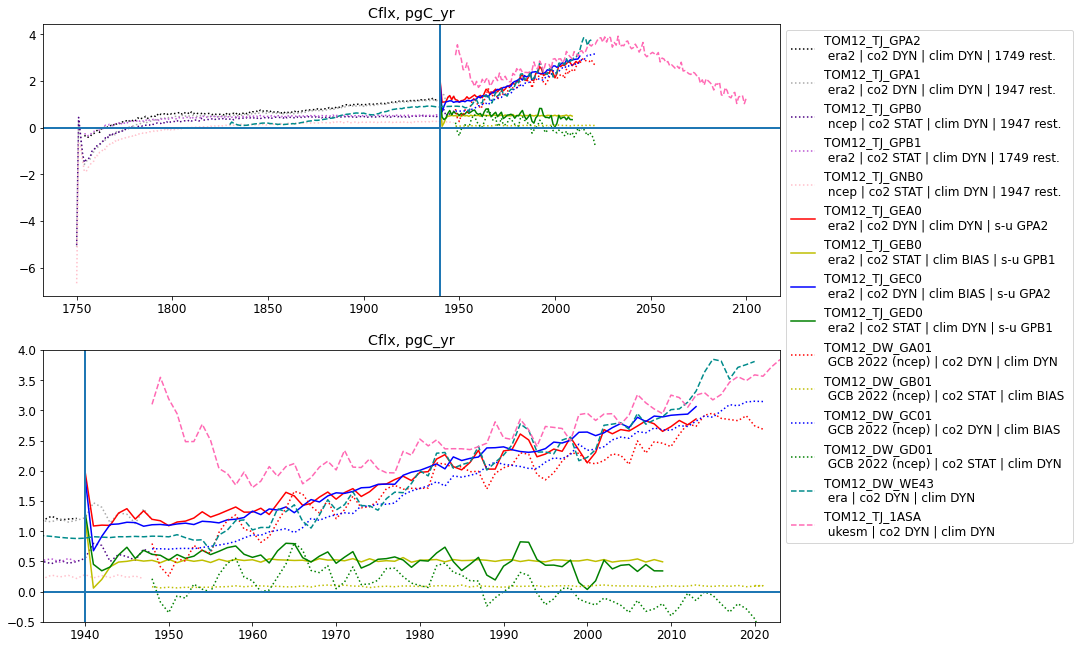

In [93]:
tvar = 'Cflx_total'
ttit = 'Cflx, pgC_yr'

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    if i == 0:
        print(msum.columns)
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].legend(ncol = 1, bbox_to_anchor = [1, 1])
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_title(ttit)

ind = 1
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_xlim([1935,2023])
    axs[ind].set_ylim([-0.5,4])
    axs[ind].set_title(ttit)


In [94]:
tmod = 'TOM12_DW_WE43'
msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
tcol = mod[tmod]['color']
tlin = mod[tmod]['linestyle']
tdesc = mod[tmod]['desc']

## full globe carbon flux, all available "A" simulations

Index(['Unnamed: 0', 'year', 'TChl_total', 'TChl_Arctic', 'TChl_NANP',
       'TChl_Equ_tot', 'TChl_SO', 'PPT_total', 'PPT_Arctic', 'PPT_NANP',
       'PPT_Equ_tot', 'PPT_SO', 'EXP_total', 'EXP_Arctic', 'EXP_NANP',
       'EXP_Equ_tot', 'EXP_SO', 'Cflx_total', 'Cflx_Arctic', 'Cflx_NANP',
       'Cflx_Equ_tot', 'Cflx_SO'],
      dtype='object')


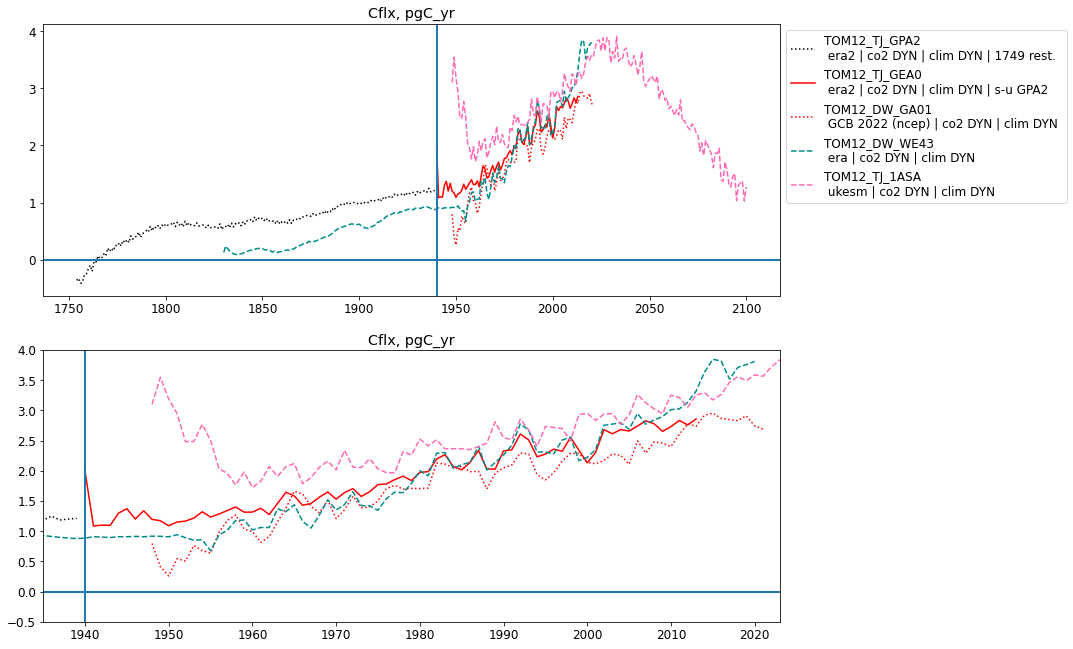

In [95]:
models = ['TOM12_TJ_GPA2',
            'TOM12_TJ_GEA0',
         'TOM12_DW_GA01',
          'TOM12_DW_WE43','TOM12_TJ_1ASA'
         ]

tvar = 'Cflx_total'
ttit = 'Cflx, pgC_yr'

tyear = 1900; tyear1 = 1750

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    if i == 0:
        print(msum.columns)
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].legend(ncol = 1, bbox_to_anchor = [1, 1])
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_title(ttit)

ind = 1
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_xlim([1935,2023])
    axs[ind].set_ylim([-0.5,4])
    axs[ind].set_title(ttit)


## Southern Ocean cflx

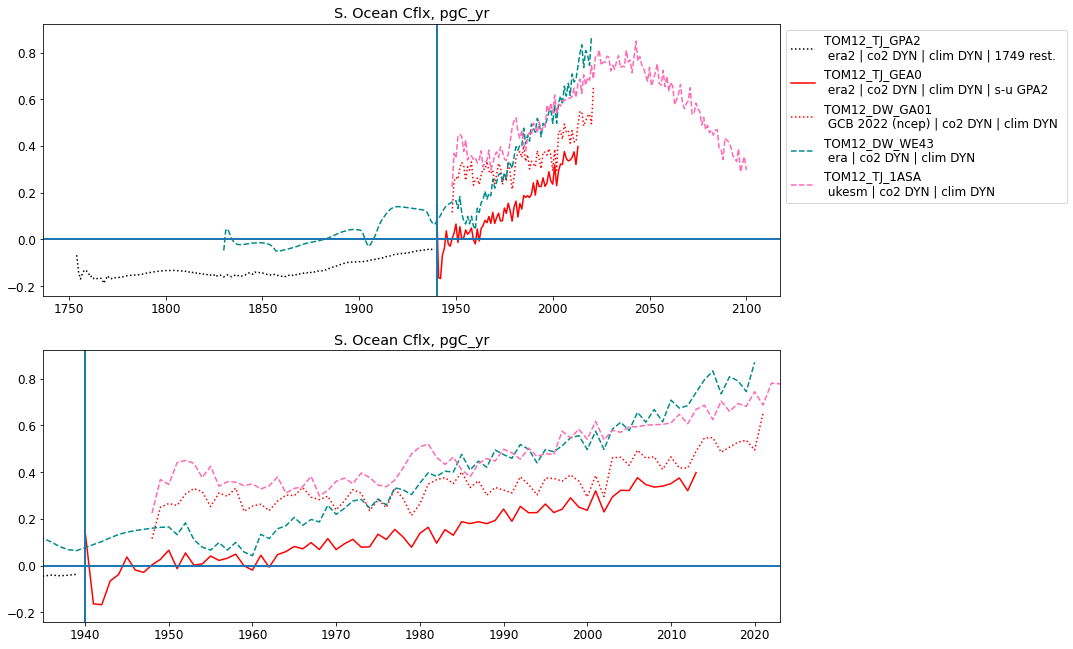

In [96]:
models = ['TOM12_TJ_GPA2',
            'TOM12_TJ_GEA0',
         'TOM12_DW_GA01',
          'TOM12_DW_WE43','TOM12_TJ_1ASA'
         ]

tvar = 'Cflx_SO'
ttit = 'S. Ocean Cflx, pgC_yr'

tyear = 1900; tyear1 = 1750

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
#     if i == 0:
#         print(msum.columns)
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].legend(ncol = 1, bbox_to_anchor = [1, 1])
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_title(ttit)

ind = 1
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_xlim([1935,2023])
    axs[ind].set_title(ttit)


Text(0.5, 1.0, 'Cflx full globe, simulations A-D and C-B {co2 rising  - co2 static}')

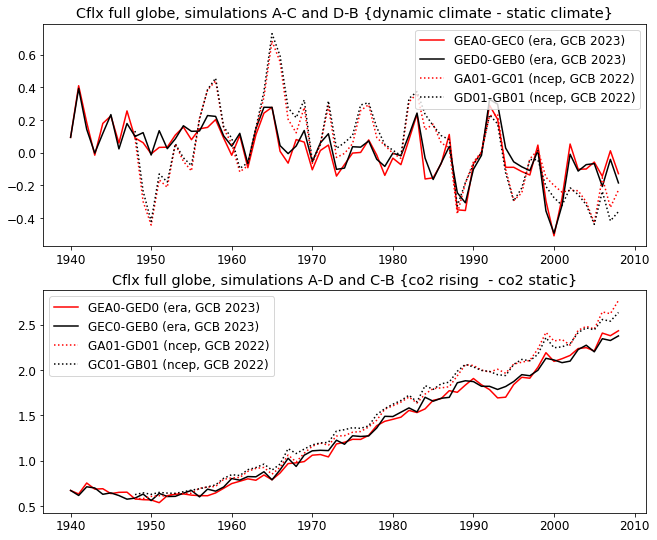

In [97]:
tyear = 2009; 
tit1 = 'Cflx full globe, simulations A-C and D-B {dynamic climate - static climate}'
tit2 = 'Cflx full globe, simulations A-D and C-B {co2 rising  - co2 static}'

tvar = 'Cflx_total'
ttit = 'Cflx, pgC_yr'

def get_plotdat(tmod,tmod2, tyear):

    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    toplot = msum[msum['year'] < tyear] 

    msum2 = pd.read_csv(f'{tcsv}{tmod2}_breakdown.csv')
    toplot2 = msum2[msum2['year'] < tyear] 
    return toplot, toplot2

fact = 0.9
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
tlin = '-'; tcol = 'r'; tlab = 'GEA0-GEC0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEA0','TOM12_TJ_GEC0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tcol = 'k'; tlab = 'GED0-GEB0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GED0','TOM12_TJ_GEB0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'r'; tlab = 'GA01-GC01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_DW_GA01','TOM12_DW_GC01',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'k'; tlab = 'GD01-GB01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_DW_GD01','TOM12_DW_GB01',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)

axs[ind].legend()
axs[ind].set_title(tit1)


ind = 1
tlin = '-'; tcol = 'r'; tlab = 'GEA0-GED0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEA0','TOM12_TJ_GED0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tcol = 'k'; tlab = 'GEC0-GEB0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEC0','TOM12_TJ_GEB0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'r'; tlab = 'GA01-GD01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_DW_GA01','TOM12_DW_GD01',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'k'; tlab = 'GC01-GB01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_DW_GC01','TOM12_DW_GB01',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
axs[ind].legend()
axs[ind].set_title(tit2)

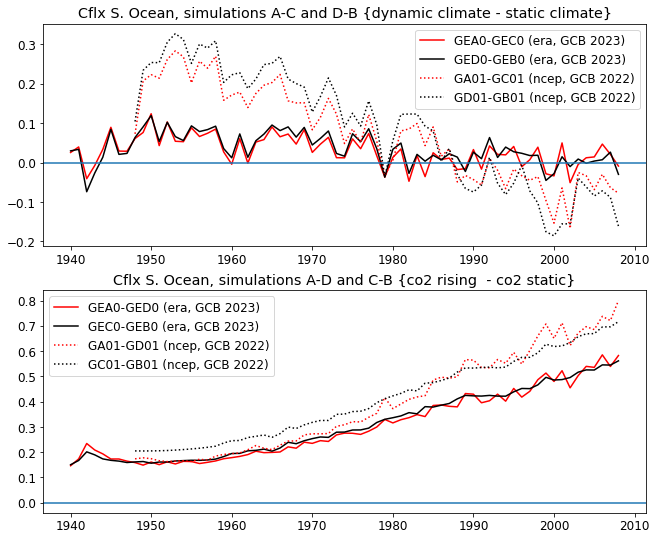

In [98]:

tit1 = 'Cflx S. Ocean, simulations A-C and D-B {dynamic climate - static climate}'
tit2 = 'Cflx S. Ocean, simulations A-D and C-B {co2 rising  - co2 static}'

tvar = 'Cflx_SO'
ttit = 'Cflx, pgC_yr'

def get_plotdat(tmod,tmod2, tyear):

    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    toplot = msum[msum['year'] < tyear] 

    msum2 = pd.read_csv(f'{tcsv}{tmod2}_breakdown.csv')
    toplot2 = msum2[msum2['year'] < tyear] 
    return toplot, toplot2

fact = 0.9
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
tlin = '-'; tcol = 'r'; tlab = 'GEA0-GEC0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEA0','TOM12_TJ_GEC0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tcol = 'k'; tlab = 'GED0-GEB0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GED0','TOM12_TJ_GEB0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'r'; tlab = 'GA01-GC01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_DW_GA01','TOM12_DW_GC01',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'k'; tlab = 'GD01-GB01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_DW_GD01','TOM12_DW_GB01',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)

axs[ind].legend()
axs[ind].set_title(tit1)


ind = 1
tlin = '-'; tcol = 'r'; tlab = 'GEA0-GED0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEA0','TOM12_TJ_GED0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tcol = 'k'; tlab = 'GEC0-GEB0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEC0','TOM12_TJ_GEB0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'r'; tlab = 'GA01-GD01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_DW_GA01','TOM12_DW_GD01',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'k'; tlab = 'GC01-GB01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_DW_GC01','TOM12_DW_GB01',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
axs[ind].legend()
axs[ind].set_title(tit2)

axs[0].axhline(y=0)
axs[1].axhline(y=0)